In [135]:
!pip3 install pdf2image



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 13.3 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [8]:
from langchain.document_loaders import PyPDFLoader

loader = PyPDFLoader("./data/Air-Fryer Chicken Breast Recipe - NYT Cooking.pdf")
pages = loader.load_and_split()

In [12]:
pages[0]

Document(page_content='Air-Fryer\nChicken Breast\nBy Eleanore Park\nArmando Rafael for The New York Times. Food Stylist: Simon Andrews.Time  25 minutes\nRating (635)\nI N G R E D I E N T S\nYield:1 to 2 servings\n1 large boneless, skinless chicken\nbreast (about 11 ounces)\nSalt\nFreshly cracked black pepper\n2 teaspoons light brown sugar\n1 tablespoon rice vinegar\n1 tablespoon low-sodium soy sauce\n2 teaspoons olive oil\nLime wedge (optional), for servingP R E P A R A T I O N\nStep 1\nHeat air fryer to 375 degrees, if preheating is recommended for\nyour air fryer.\nStep 2\nPat chicken breast dry with a paper towel. Cut chicken breast in\nhalf crosswise into two pieces of equal weight, creating one\nshorter, thicker piece and one longer, thinner piece. Season\nchicken generously on all sides with salt and pepper; rub brown\nsugar all over. (Chicken breast can be seasoned and left\nuncovered for up to 12 hours in the refrigerator. Let the chicken\ncome to room temperature before cookin

In [13]:
import os
import getpass

os.environ['OPENAI_API_KEY'] = getpass.getpass('OpenAI API Key:')

In [23]:
from langchain.vectorstores import FAISS
from langchain.embeddings.openai import OpenAIEmbeddings

faiss_index = FAISS.from_documents(pages, OpenAIEmbeddings())
docs = faiss_index.similarity_search("How long will this recipe take?", k=2)
for doc in docs:
    print(str(doc.metadata["page"]) + ":", doc.page_content[:300])

1: Transfer chicken to the air fryer basket, setting leftover marinade
aside. Cook for 6 minutes and flip the chicken over. Spoon the
remaining marinade over chicken. Cook until chicken is lightly
browned, the sauce has turned slightly sticky on the chicken and
the internal temperature at the thickest 
0: Air-Fryer
Chicken Breast
By Eleanore Park
Armando Rafael for The New York Times. Food Stylist: Simon Andrews.Time  25 minutes
Rating (635)
I N G R E D I E N T S
Yield:1 to 2 servings
1 large boneless, skinless chicken
breast (about 11 ounces)
Salt
Freshly cracked black pepper
2 teaspoons light brown


In [25]:
from langchain.document_loaders import TextLoader
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.text_splitter import CharacterTextSplitter
from langchain.vectorstores import Chroma

# Load the document, split it into chunks, embed each chunk and load it into the vector store.
loader = PyPDFLoader("./data/Air-Fryer Chicken Breast Recipe - NYT Cooking.pdf")
pages = loader.load_and_split()
db = Chroma.from_documents(pages, OpenAIEmbeddings())

In [26]:
query = "How long will the recipe take?"
docs = db.similarity_search(query)
print(docs[0].page_content)

Number of requested results 4 is greater than number of elements in index 2, updating n_results = 2


Transfer chicken to the air fryer basket, setting leftover marinade
aside. Cook for 6 minutes and flip the chicken over. Spoon the
remaining marinade over chicken. Cook until chicken is lightly
browned, the sauce has turned slightly sticky on the chicken and
the internal temperature at the thickest part of the meat reaches
165 degrees, another 6 to 10 minutes. The thicker half of the
breast may need a few more minutes to cook through than the
smaller piece.
Step 5
Transfer the chicken to a cutting board to rest for at least 5
minutes so the juices can settle and redistribute. Slice the chicken
against the grain. Pour any sauce left at the bottom of the air
fryer over the chicken and serve. For some extra brightness,
squeeze lime wedge all over the chicken, if desired.
Private Notes
Leave a Private Note on this recipe and see it here.


In [31]:
from langchain.vectorstores import Qdrant
query = "What did the president say about Ketanji Brown Jackson"
docs = await db.asimilarity_search(query)
print(docs[0].page_content)

Number of requested results 4 is greater than number of elements in index 2, updating n_results = 2


Air-Fryer
Chicken Breast
By Eleanore Park
Armando Rafael for The New York Times. Food Stylist: Simon Andrews.Time  25 minutes
Rating (635)
I N G R E D I E N T S
Yield:1 to 2 servings
1 large boneless, skinless chicken
breast (about 11 ounces)
Salt
Freshly cracked black pepper
2 teaspoons light brown sugar
1 tablespoon rice vinegar
1 tablespoon low-sodium soy sauce
2 teaspoons olive oil
Lime wedge (optional), for servingP R E P A R A T I O N
Step 1
Heat air fryer to 375 degrees, if preheating is recommended for
your air fryer.
Step 2
Pat chicken breast dry with a paper towel. Cut chicken breast in
half crosswise into two pieces of equal weight, creating one
shorter, thicker piece and one longer, thinner piece. Season
chicken generously on all sides with salt and pepper; rub brown
sugar all over. (Chicken breast can be seasoned and left
uncovered for up to 12 hours in the refrigerator. Let the chicken
come to room temperature before cooking.)
Step 3
In a medium bowl, combine the rice vin

In [32]:
from langchain.chains import RetrievalQA
from langchain.llms import OpenAI

In [33]:
from langchain.document_loaders import TextLoader
loader = PyPDFLoader("./data/Air-Fryer Chicken Breast Recipe - NYT Cooking.pdf")

In [34]:
from langchain.indexes import VectorstoreIndexCreator

In [35]:
index = VectorstoreIndexCreator().from_loaders([loader])

In [37]:
query = "How long will it take?"
index.query(query)

' It will take 6 to 10 minutes for the internal temperature at the thickest part of the meat to reach 165 degrees.'

In [38]:
documents = loader.load()

In [47]:
from langchain.document_loaders import PyPDFDirectoryLoader
loader = PyPDFDirectoryLoader("./data/")

In [48]:
from langchain.text_splitter import CharacterTextSplitter
from langchain.vectorstores import FAISS
from langchain.embeddings import OpenAIEmbeddings

documents = loader.load()
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
texts = text_splitter.split_documents(documents)
embeddings = OpenAIEmbeddings()
db = FAISS.from_documents(texts, embeddings)

In [49]:
retriever = db.as_retriever()

In [96]:
retriever = db.as_retriever(search_kwargs={"k": 4, "score_threshold": .5})

In [66]:
docs = retriever.get_relevant_documents("pasta")

In [98]:
docs_scores = db.similarity_search_with_score("pasta")

In [105]:
for doc in docs_scores:
    print(doc[0])

page_content='BLT Pasta\nBy Colu Henry\nLinda Xiao for The New York Times. Food Stylist: Ali Slagle.Time30 minutes\nRating (1943)\nI N G R E D I E N T S\nYield:4 to 6 servings\n1 pound paccheri pasta or other\ntubelike shape, such as penne or\nrigatoni\n8 ounces bacon, diced into ½-inch\npieces\n1 pound cherry tomatoes, halved\nKosher salt (such as Diamond\nCrystal) and black pepper\n5 ounces baby arugula\n½ cup grated Pecorino Romano,\nplus more for serving\nFlaky salt, for serving (optional)P R E P A R A T I O N\nStep 1\nBring a large pot of well-salted water (2 heaping tablespoons\nkosher salt to about 7 quarts water) to a boil. Add pasta and cook\nuntil it is just under al dente, 1 minute less than package\ndirections. Reserve 1 cup of the pasta cooking water, and drain the\npasta.\nStep 2\nMeanwhile, make the sauce: Place the bacon in a large skillet and\ncook over medium-low heat until crisp, stirring occasionally to\nmake sure it does not burn, about 8 minutes. Remove with a\nsl

In [67]:
for doc in docs:
    print(doc.metadata)

{'source': 'data/BLT Pasta Recipe - NYT Cooking.pdf', 'page': 0}
{'source': 'data/Spaghetti Carbonara Recipe - NYT Cooking.pdf', 'page': 0}
{'source': 'data/Spaghetti Carbonara Recipe - NYT Cooking.pdf', 'page': 1}
{'source': 'data/Smoky Tomato Carbonara Recipe - NYT Cooking.pdf', 'page': 1}


In [72]:
from langchain.llms import OpenAI
llm = OpenAI()

In [ ]:
#for streaming
from langchain.llms import OpenAI
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler


llm = OpenAI(streaming=True, callbacks=[StreamingStdOutCallbackHandler()], temperature=0)
resp = llm("Write me a song about sparkling water.")

In [71]:
llm("Tell me a joke")



Q: What did the fish say when it hit the wall?
A: Dam!

'\n\nQ: What did the fish say when it hit the wall?\nA: Dam!'

In [73]:
from langchain.llms import OpenAI
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate

In [114]:
# This is an LLMChain to write a synopsis given a title of a play.
llm = OpenAI(temperature=.7)
template = """You are a recipe search bot. Given a prompt from the end user you will generate search terms relevant to the question to help responding to the prompt.
prompt from user: {user_prompt}
Recipe Search Terms: """

prompt_template = PromptTemplate(input_variables=["user_prompt"], template=template)
recipe_terms_chain = LLMChain(llm=llm, prompt=prompt_template)

In [118]:
templateRecipeReader = """You are a recipe recommender bot. You will be given context about a recipe. You will be knowledgable about the recipe and explain it highlighting key details like ingredients, time duration, difficulty and an over synopsis.

recipe data: {recipe_data}

Recipe Explanation:
"""
prompt_template_recipe_reader = PromptTemplate(input_variables=["recipe_data"], template=templateRecipeReader)
recipe_reader_chain = LLMChain(llm=llm, prompt=prompt_template_recipe_reader)

In [110]:
# This is the overall chain where we run these two chains in sequence.


from langchain.chains import SimpleSequentialChain
from langchain.chains import SequentialChain
recipe_terms_chain()
overall_chain = SequentialChain(chains=[recipe_terms_chain], verbose=True)

TypeError: Chain.__call__() missing 1 required positional argument: 'inputs'

In [87]:
search_terms_raw = overall_chain.run("I want a recipe that is healthy and uses chicken")



> Entering new SimpleSequentialChain chain...

"healthy chicken recipes", "low-calorie chicken recipes", "healthy chicken dinner recipes", "healthy chicken breast recipes", "diet-friendly chicken recipes", "nutrition-packed chicken recipes", "healthy chicken and vegetable recipes"

> Finished chain.


In [90]:
search_terms = search_terms_raw.split(", ")

print(search_terms[3])

"healthy chicken breast recipes"


In [91]:
docs = retriever.get_relevant_documents(search_terms[0])

In [92]:
for doc in docs:
    print(doc.metadata)

{'source': 'data/Skillet Chicken With Turmeric and Orange\xa0 Recipe - NYT Cooking.pdf', 'page': 0}
{'source': 'data/Chicken Manchurian Recipe - NYT Cooking.pdf', 'page': 0}
{'source': 'data/Chicken Stroganoff\xa0 Recipe - NYT Cooking.pdf', 'page': 0}
{'source': 'data/Spicy Honey Chicken With Broccoli Recipe - NYT Cooking.pdf', 'page': 0}


In [136]:
from IPython.display import Image
from pdf2image import convert_from_path
from IPython.display import display, Image


In [138]:
def searchRecipes(prompt):
    # generate search terms
    search_terms_raw = recipe_terms_chain.run(user_prompt=prompt)
    # clean the search terms generated by the LLM
    search_terms = search_terms_raw.split(", ")
    # query vector db using search term

    print(f'I am searching using this search term: {search_terms[0]}')

    docs = retriever.get_relevant_documents(search_terms[0])

    print(docs[0].metadata)

    source_pdf_path = docs[0].metadata.get('source')

    doc = docs[0]

    # print the docs returned
    # for doc in docs:
    #     print(doc.metadata)

    bot_response = recipe_reader_chain.run(recipe_data=doc.page_content)

    print(bot_response)

    pdf = open(source_pdf_path, 'rb')


    images = convert_from_path(source_pdf_path)

    for img in images:
        display(img)


        # Display the PDF file
        Image(pdf)

    


I am searching using this search term:  Grilled Chicken
{'source': 'data/Stovetop BBQ Chicken Recipe - NYT Cooking.pdf', 'page': 0}
This is a delicious and easy recipe for Stovetop BBQ Chicken! It only takes 30 minutes to make and is perfect for a weeknight dinner. The ingredients for the marinade include ketchup, apple cider vinegar, Worcestershire or soy sauce, smoked paprika, garlic powder, ground cayenne and chicken. The butter is used to cook the chicken in a skillet. First, mix all the ingredients for the marinade in a large bowl and marinate the chicken for 2 hours. Then, melt the butter in the skillet and add the chicken, cooking it on both sides until cooked through and charred in spots, around 6 to 8 minutes. Finally, stir ¼ cup of water into the remaining bowl of sauce and pour it over the chicken. Enjoy with some green goddess slaw, potato chips or pickles!


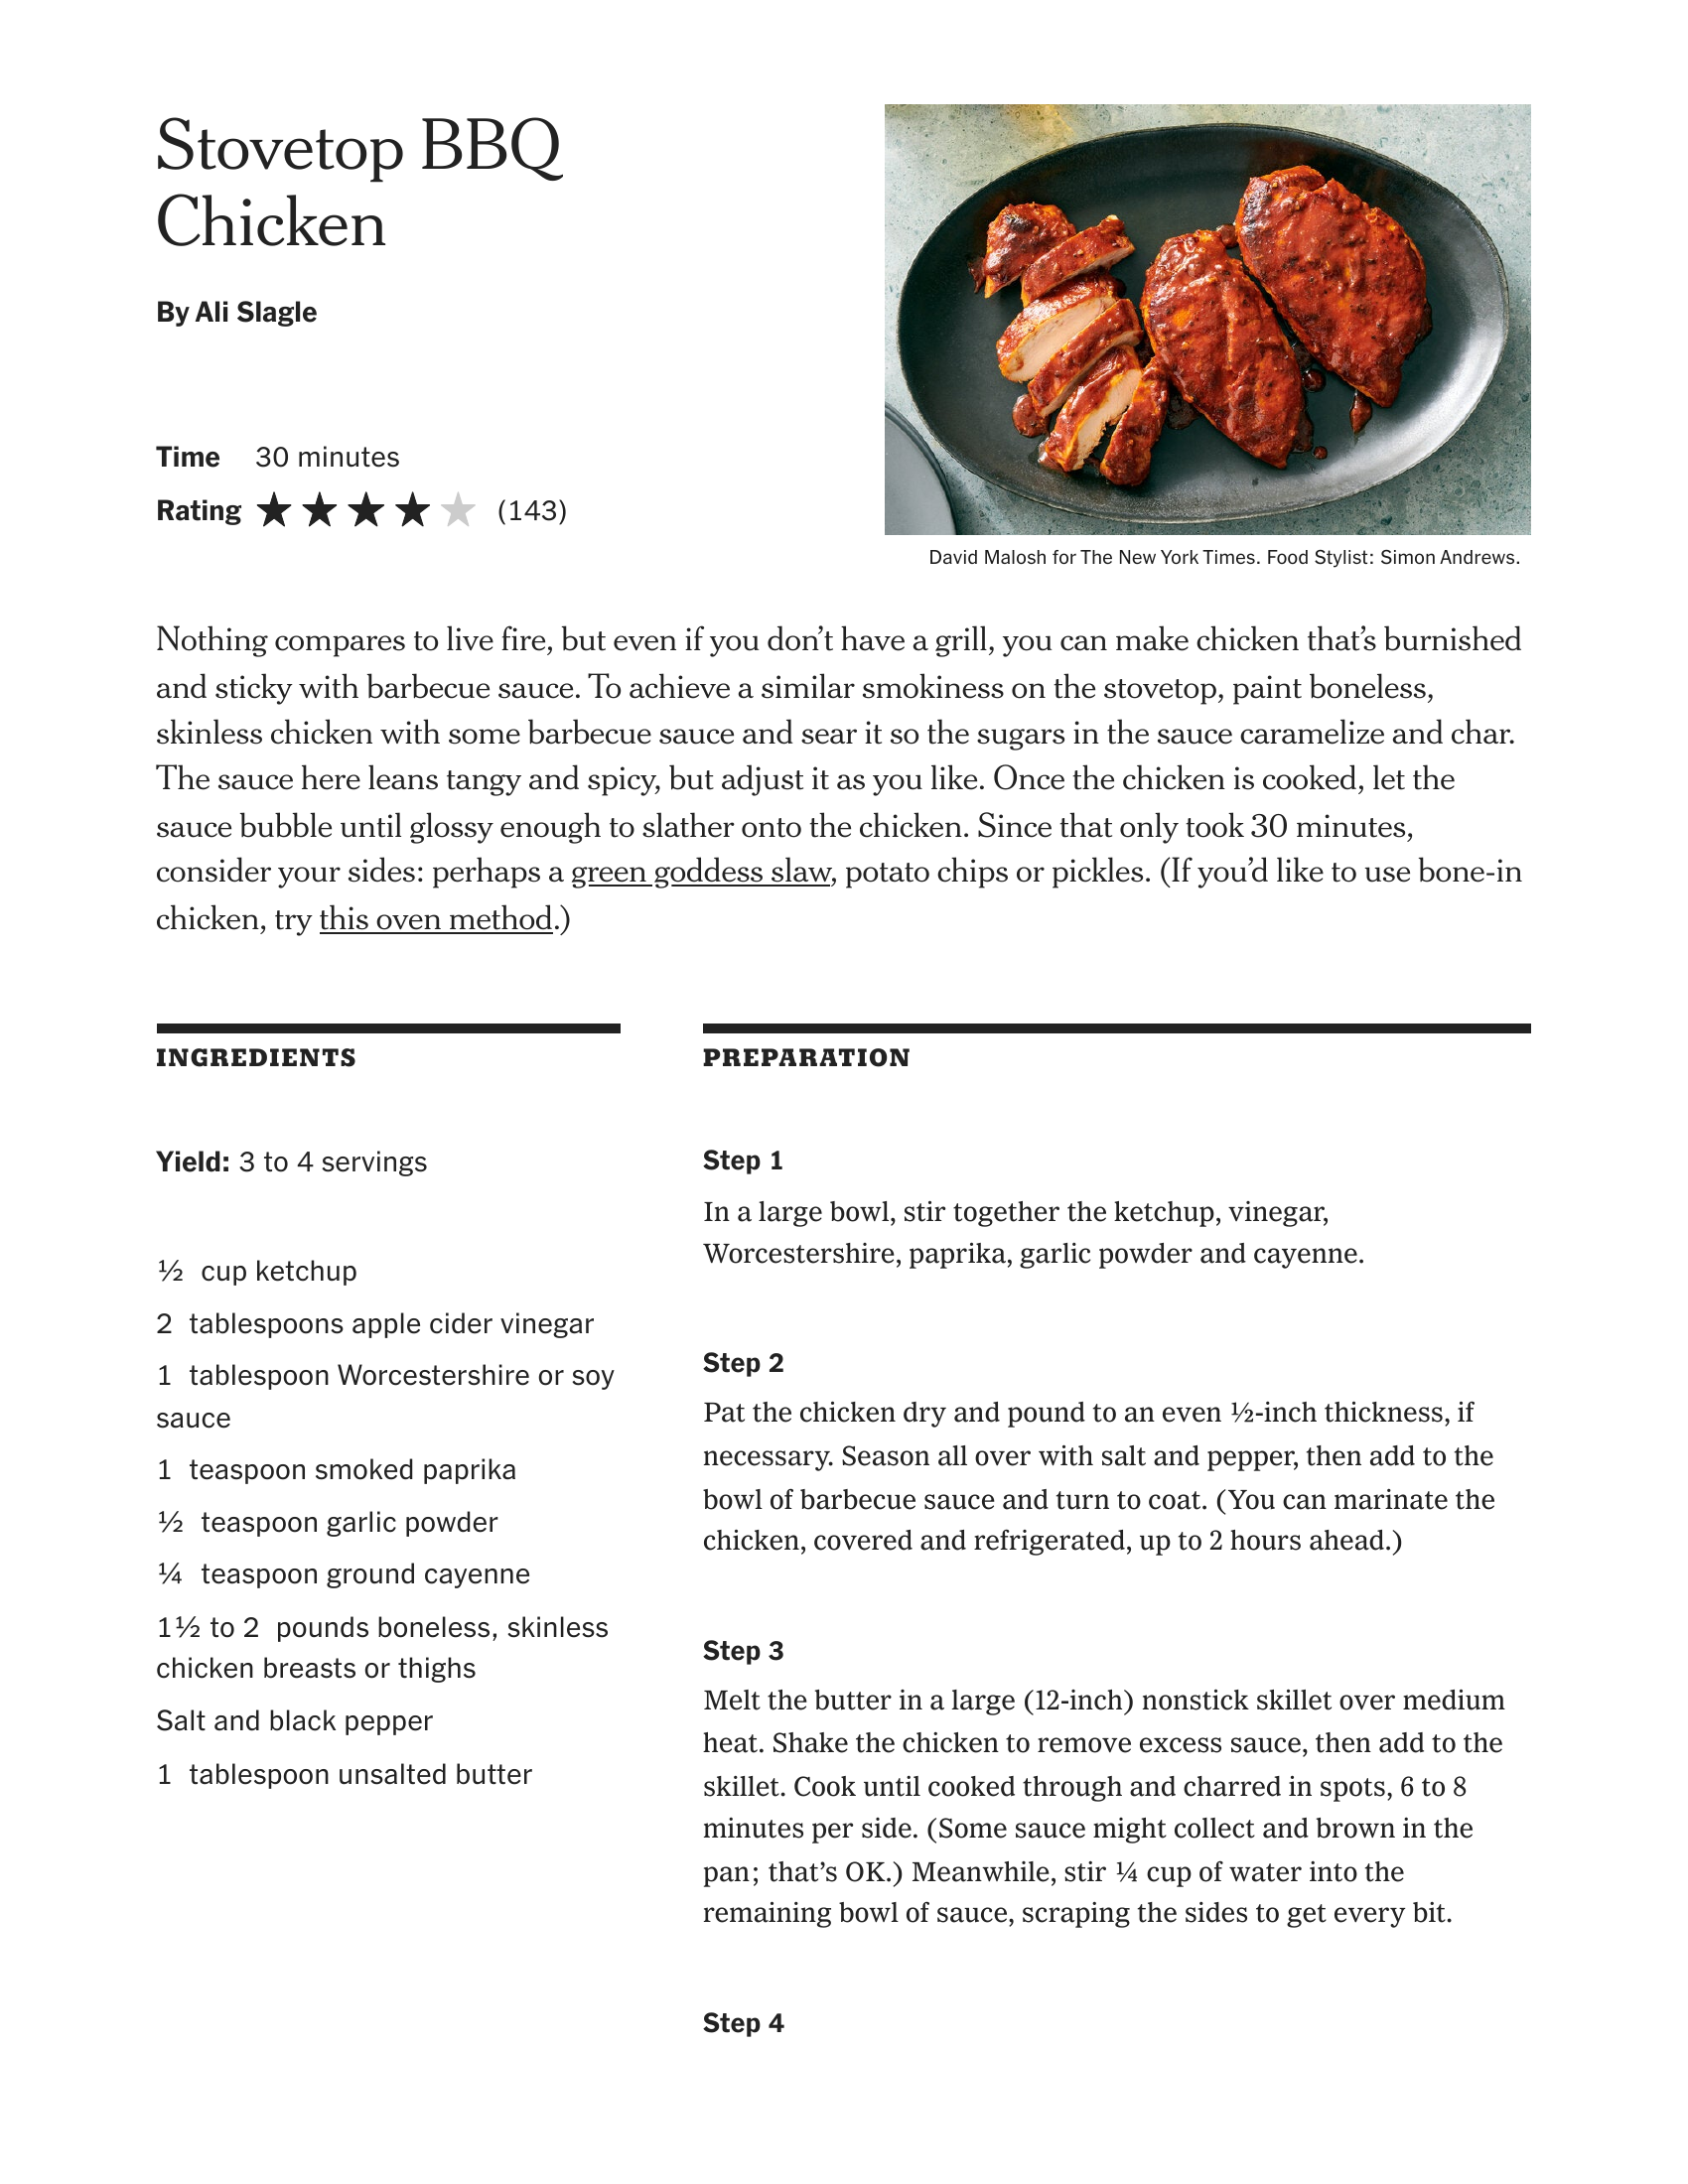

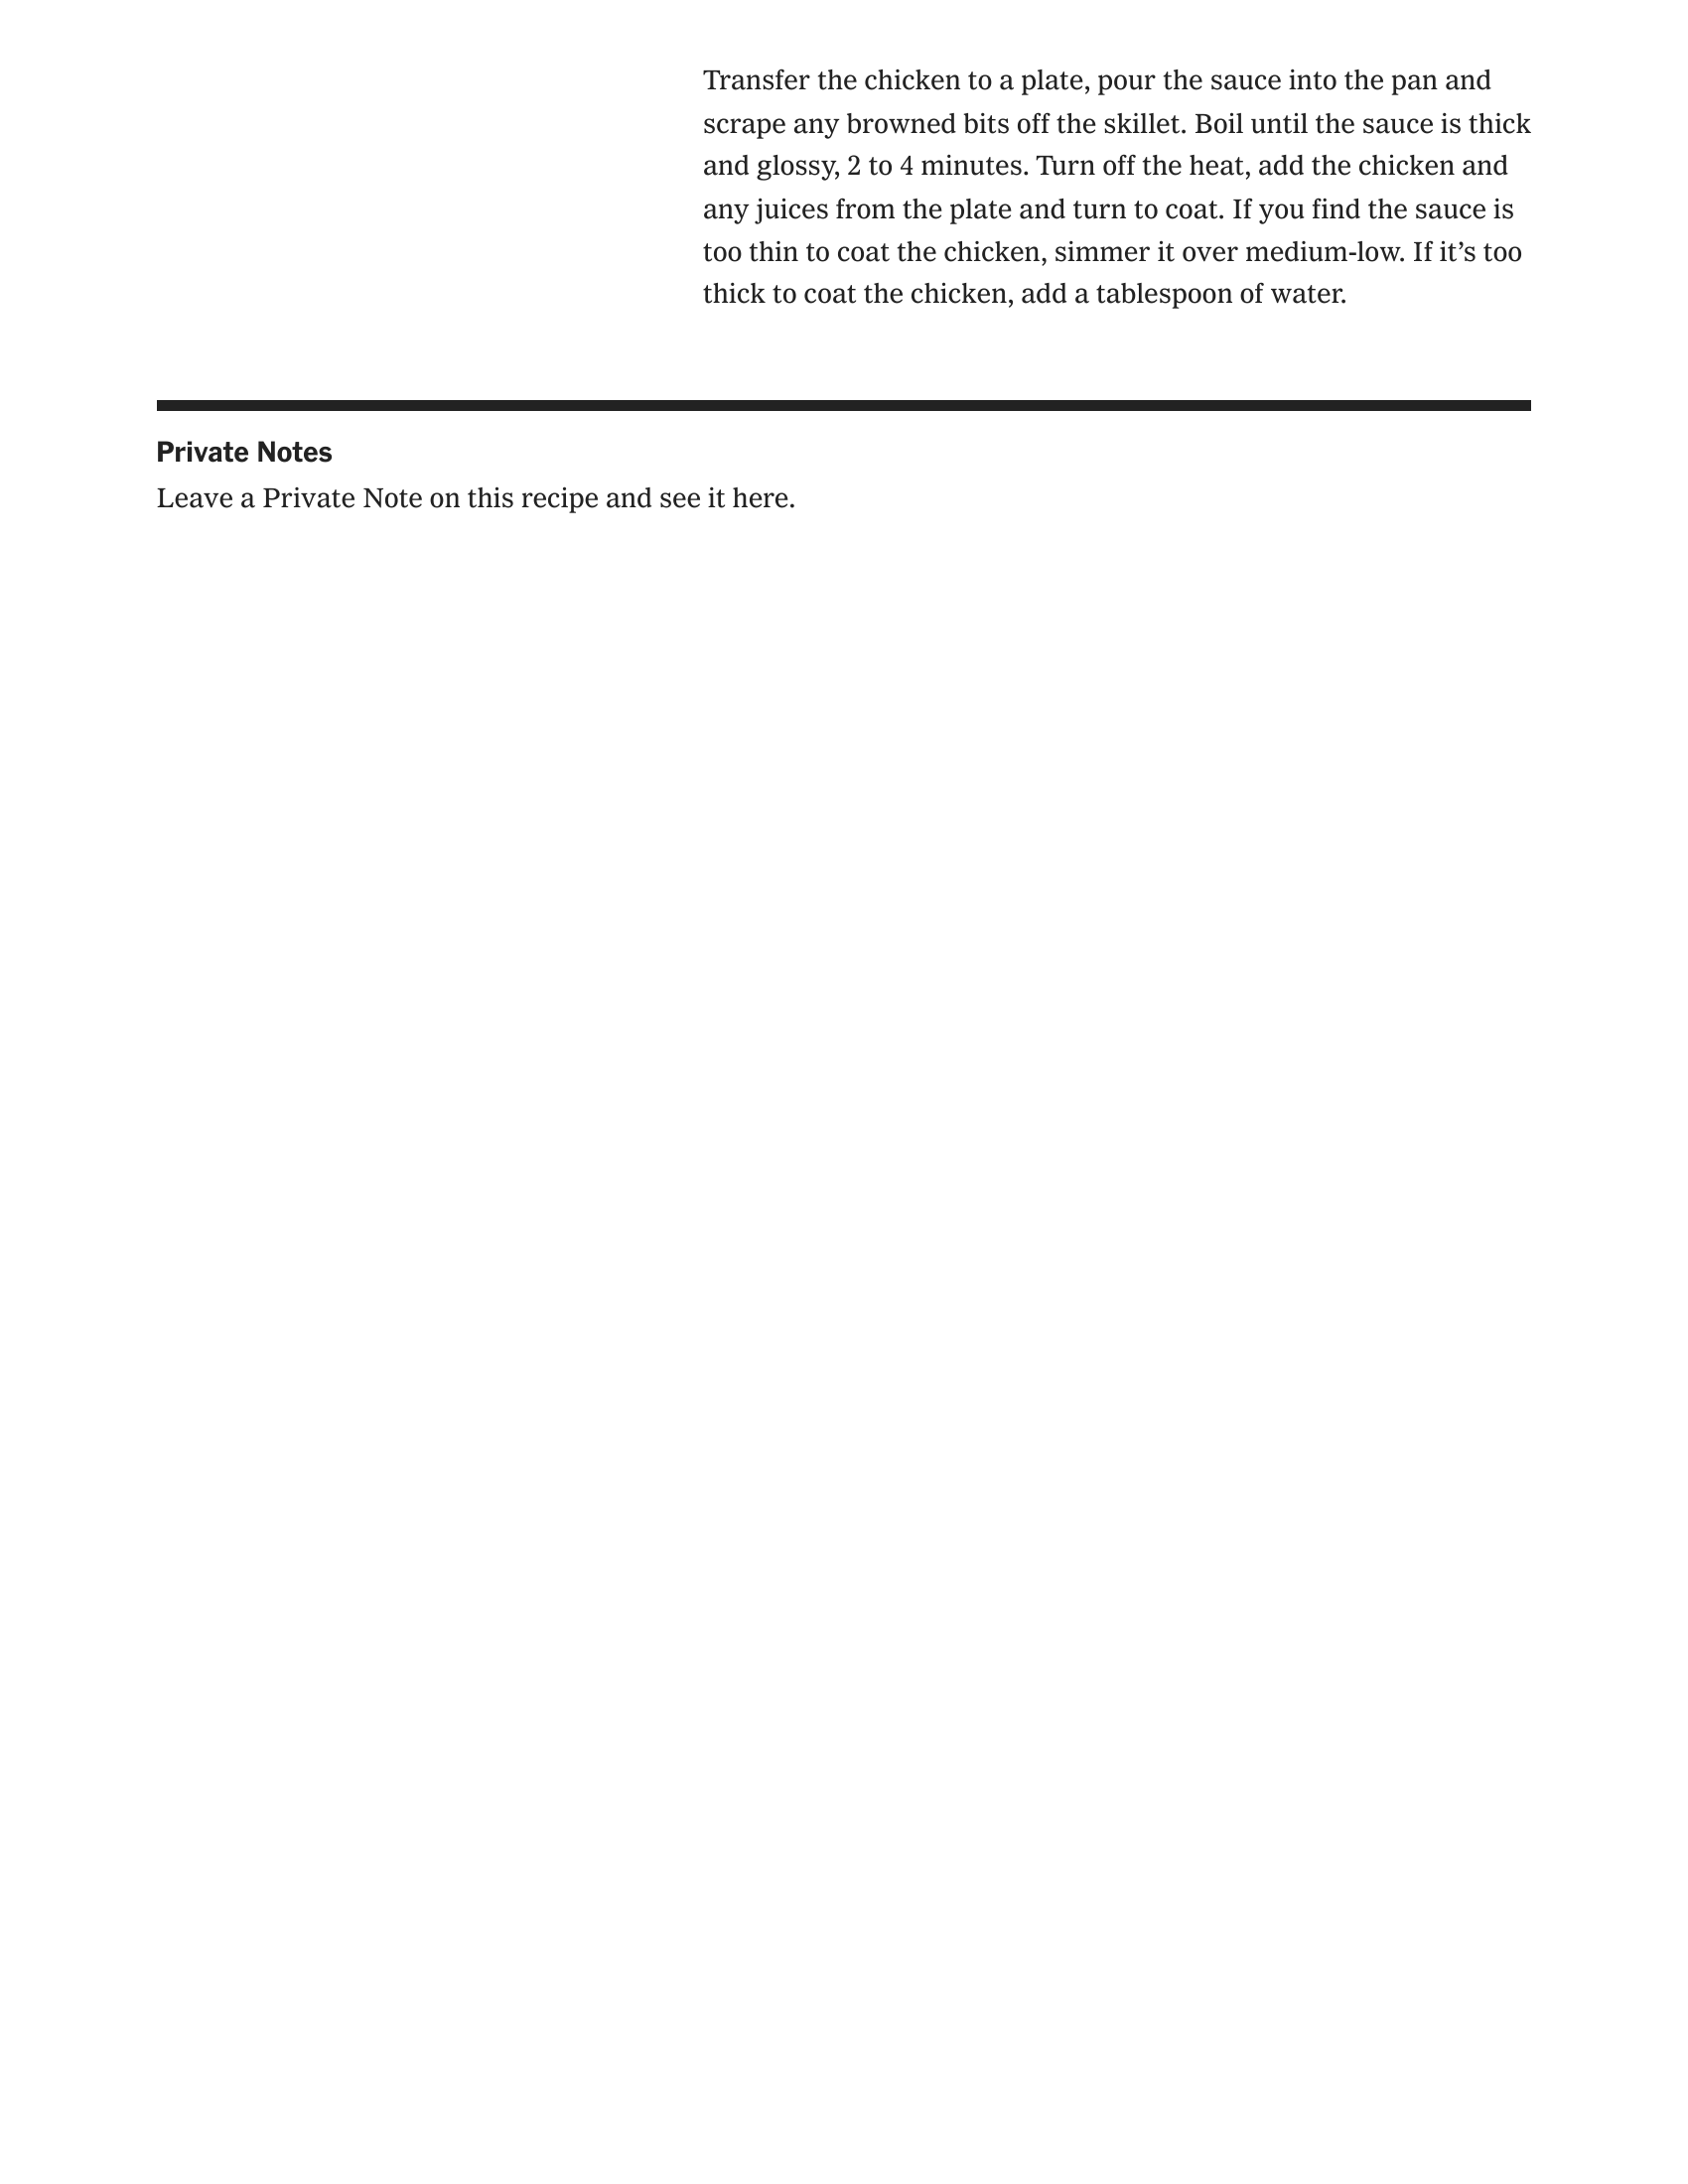

In [141]:
searchRecipes('I am looking for a grilled chicken recipe')

In [109]:
recipe_terms_chain.run(recipe_data=doc[0].page_content)

'This recipe is a classic Italian dish called Carbonara. It is a simple dish that is quick and easy to prepare, making it perfect for a busy weeknight meal. The main ingredients are pasta, eggs, cheese, pepper, and pasta water. To start, cook the pasta according to the package instructions. Then, in a separate bowl, whisk together eggs, cheese, and pepper. Once the pasta is cooked, add it to the skillet and stir to combine. Next, slowly drizzle in the hot pasta water while whisking to temper the egg mixture. Finally, pour the egg mixture into the pasta and toss until fully incorporated. Serve with extra cheese and pepper, and add more pasta water to reach desired consistency. Enjoy!'